<a href="https://colab.research.google.com/github/saahilahujaa/Hotel-Booking-Analysis/blob/main/M1W4_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Alma Better/Capstone Projects/EDA/Hotel Booking/Hotel Bookings.csv'
df = pd.read_csv(file_path)

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1
lead_time,342,737,7,13,14,14,0,9,85,75
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3
adults,2,2,1,1,2,2,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We observe that there are a total of 32 columns and few of these columns such as 'children', 'country', 'agent' and 'company' have null values.

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df_1 = df.copy()

In [10]:
df_1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
df_1['is_canceled'].unique()

array([0, 1])

In [12]:
df_1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [13]:
df_1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [14]:
df_1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [16]:
  df_1['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

# **Cleaning of Data**


## **1. Remove duplicate rows if any**

In [ ]:
df_1[df_1.duplicated()].shape

(31994, 32)

In [17]:
df_1.drop_duplicates(inplace=True)

In [18]:
df_1.shape

(87396, 32)

# **2. Handle missing values**

In [19]:
df_1.isnull().sum().sort_values(ascending = False)[:8]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
booking_changes           0
deposit_type              0
dtype: int64

We have 4 variables which have null values and we need to work upon this in order to remove such values.

Company and Agent columns have the company or agent number as data. So, there might be instances when a customer books a hotel without any agent or company. In such a case the values in these columns would be null. We'll fill up these values with 0.

In [20]:
df_1[['agent','company']] = df_1[['agent','company']].fillna(0)

Next column with missing value is 'country'. This column basically represents the country of origin of the customer. \ Since, this column has datatype of string, we would replace the missing value with the mode of 'country' column.

In [21]:
df_1['country'].fillna('Others', inplace = True)

In [22]:
df_1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

The column 'children' has 0 value stored. This means no children were present in group of customers who made that particular transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with average value of children.

In [23]:
df_1['children'].fillna(df_1['children'].mean(), inplace = True)

Now, let's check if we removed all the null values present in our data.

In [24]:
df_1.isnull().sum().sort_values(ascending = False)[:8]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
dtype: int64

There are some rows with a total number of adults, children and babies equal to zero. So we will remove such rows.

In [25]:
df_1[df_1['adults']+df_1['children']+df_1['babies'] == 0].shape

(166, 32)

In [26]:
df_1.drop(df_1[df_1['adults']+df_1['children']+df_1['babies'] == 0].index, inplace = True)

# **3. Converting columns to appropriate datatypes.**

In [27]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df_1[['children', 'agent', 'company']] = df_1[['children', 'agent', 'company']].astype('int64')

In [28]:
# changing datatype of column 'reservation_status_date' to data_type.
df_1['reservation_status_date'] = pd.to_datetime(df_1['reservation_status_date'], format = '%Y-%m-%d')

# **4. Adding important columns.**

In [29]:
# Adding total no. of staying days in hotels
df_1['total_stay'] = df_1['stays_in_week_nights']+df_1['stays_in_weekend_nights']

In [30]:
# Adding total people as column, i.e. total people = num of adults + children + babies
df_1['total_people'] = df_1['adults']+df_1['babies']+df_1['children']

We are adding this column so that we can analyse the stay length at hotels.

# ***EDA***

Lets first find the correlation between the numerical data.\ \

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.\ \

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [31]:
numerical_df_1 = df_1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


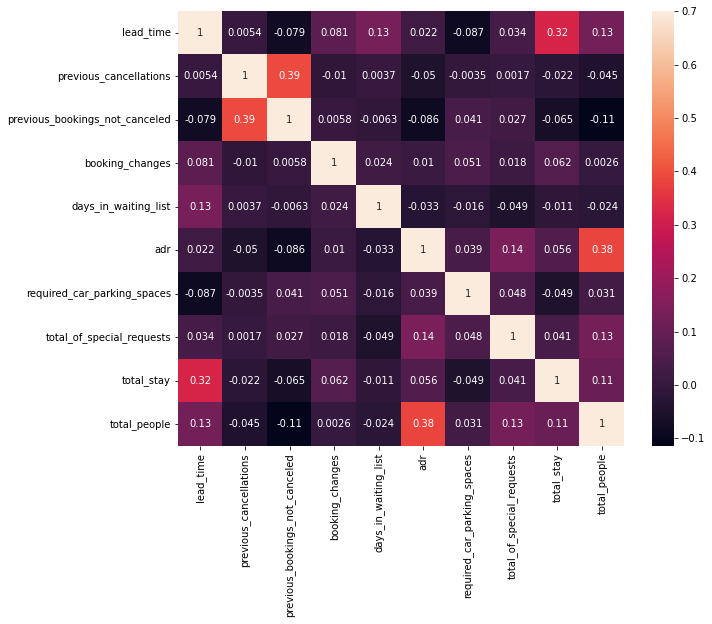

In [37]:
#correlation matrix
correlmat = numerical_df_1.corr()
# f, ax = plt.subplots(figsize=(10, 8)) 
plt.figure(figsize=(10,8))
sns.heatmap(correlmat, annot=True, vmax=0.7)

1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan a little before the the actual arrival.

2) adr (Average Daily Rate) is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

Lets see does length of stay affects the adr.

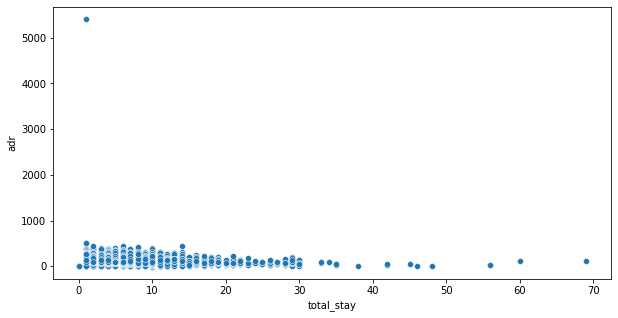

In [38]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'adr', x = 'total_stay', data=df_1)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [39]:
df_1.drop(df_1[df_1['adr'] > 1000].index, inplace = True)

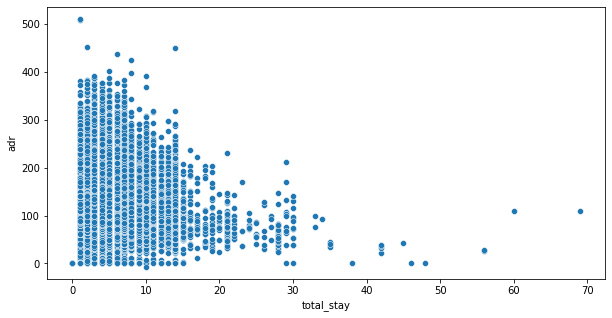

In [40]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_1)
plt.show()

From the scatter plot we can see that with an increase in the length of total_stay, the adr decreases. This suggests that for longer stay, the better deal for customer can be finalised.



# **Univariate Analysis**

Q1. Which agent makes most no. of bookings?

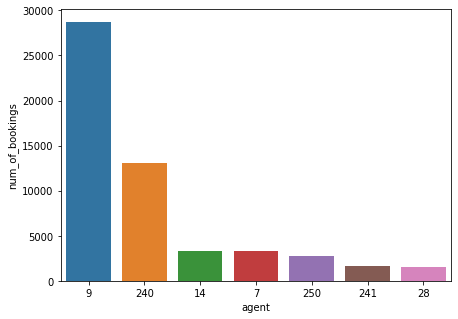

In [50]:
d1 = pd.DataFrame(df_1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:7]                                                   # Selecting top 7 performing agents
plt.figure(figsize = (7,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

Agent 9 has made most no. of bookings.

Q2. Which room type is in most demand and which room type generates highest adr?



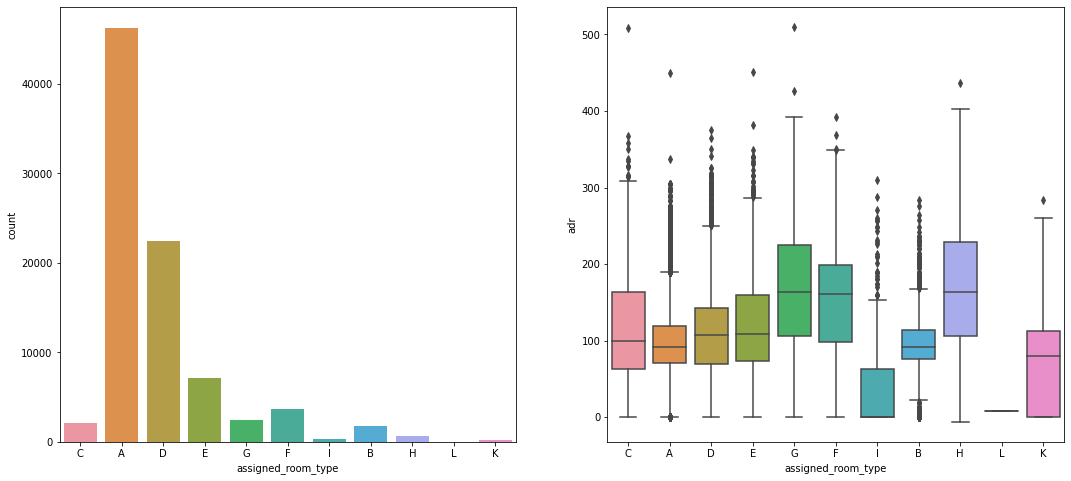

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df_1.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df_1['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df_1['assigned_room_type'], y = df_1['adr'])
plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A, G and H to maximise revenue.



Q3. Which meal type is most preffered meal of customers?

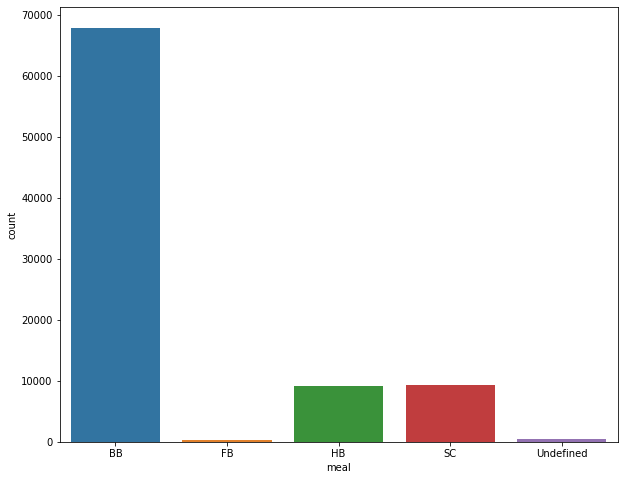

In [52]:
plt.figure( figsize=(10, 8))
sns.countplot(x = df_1['meal'])
plt.show()

Most preferred meal type is **BB (Bed and Breakfast)**.

# **(1) Hotel wise analysis**

Q1. What is percentage of bookings in each hotel?

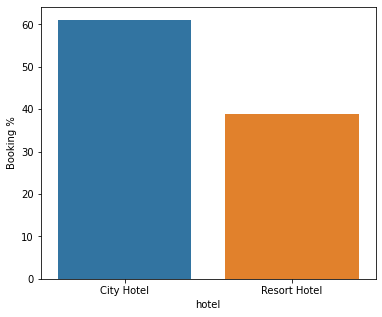

In [62]:
grouped_by_hotel = df_1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df_1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating booking percentage
plt.figure(figsize = (6,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

Q2. Which hotel seems to make more revenue?

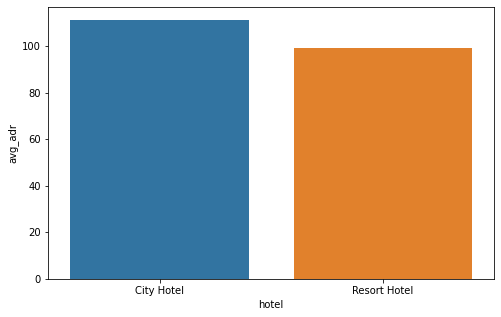

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

Avg adr of Resort hotel is a bit lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

Q3. What is the preferred stay length in each hotel?

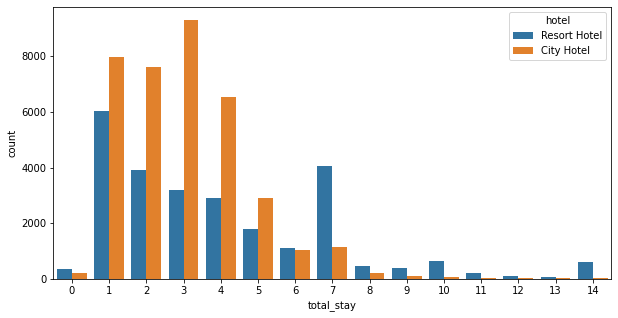

In [66]:
not_canceled = df_1[df_1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

# **(2) Distribution Channel wise Analysis**

Q1. Which is the most common channel for booking hotels?



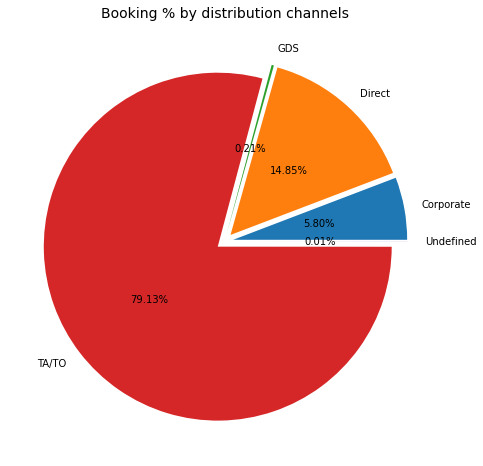

In [68]:
group_by_dc = df_1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df_1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

Q2. Which distribution channel brings better revenue generating deals for hotels?



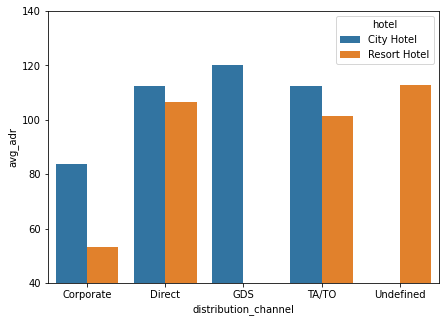

In [67]:
group_by_dc_hotel = df_1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

## **(3) Booking cancellation Analysis**


Q1. Which significant distribution channel has highest cancellation percentage?

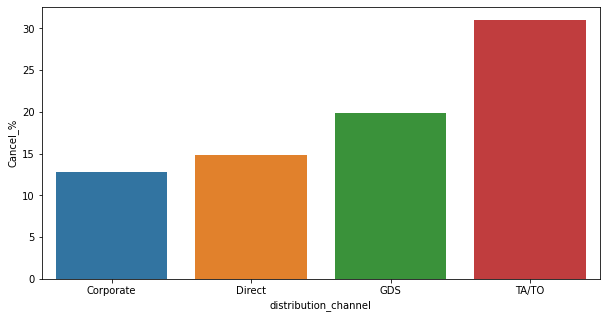

In [75]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation percentage. Therefore, a booking via TA/TO is around 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers \ \ One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

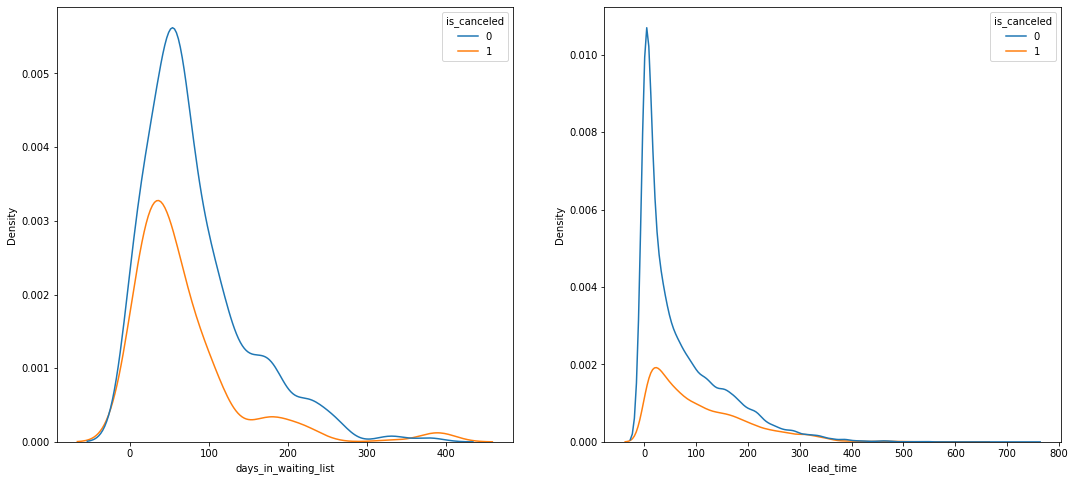

In [76]:
waiting_bookings = df_1[df_1['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df_1['lead_time'], hue = df_1['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. \ \ Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

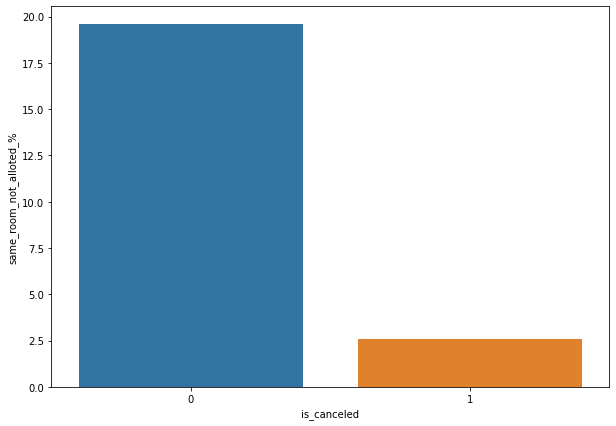

In [77]:
def check_room_allot(a):
  if a['reserved_room_type'] != a['assigned_room_type']:
    return 1
  else:
    return 0

df_1['same_room_not_alloted'] = df_1.apply(lambda a : check_room_allot(a), axis = 1)
grp_by_canc = df_1.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

Lets see does not getting same room affects the adr.

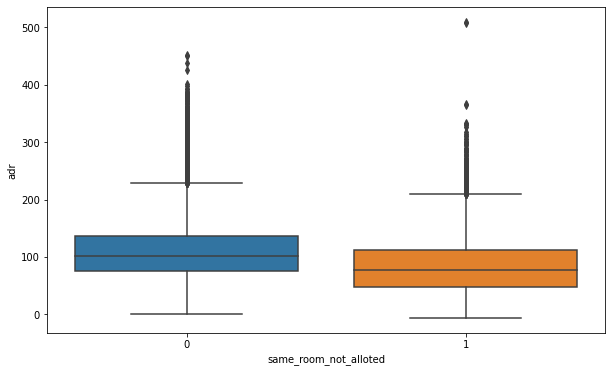

In [78]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = df_1)
plt.show()

So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

# **From where does most of the guests are coming?**


In [73]:
country_wise_guests = df_1[df_1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


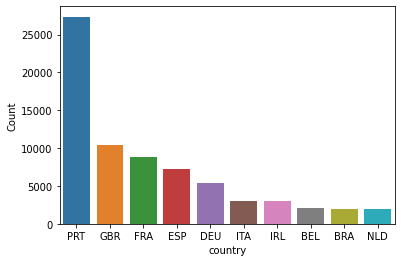

In [72]:
grouped_by_country = df_1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

Most guests are from Portugal and other Europian contries.